![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/multi_lingual_text_classification/colab/Training/multi_lingual/binary_text_classification/NLU_multi_lingual_training_sentiment_classifier_demo_covid_19.ipynb)


# Training a Sentiment Analysis Classifier with NLU 
## 2 Class COVID19 Sentiment Classifier Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training  data  : 

<br> 

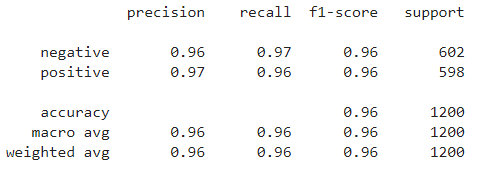


You can achieve these results or even better on this dataset with test  data  : 

<br>

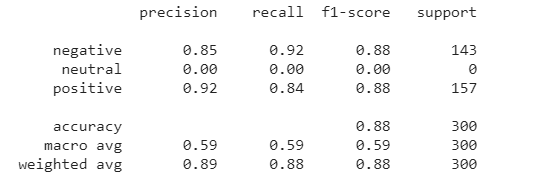

# 1. Install Java 8 and NLU

In [ ]:
import os
from sklearn.metrics import classification_report
! apt-get update -qq > /dev/null   
# Install java|
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install  pyspark==2.4.7 
! pip install nlu > /dev/null    



import nlu

  Using cached https://files.pythonhosted.org/packages/e2/06/29f80e5a464033432eedf89924e7aa6ebbc47ce4dcd956853a73627f2c07/pyspark-2.4.7.tar.gz
  Using cached https://files.pythonhosted.org/packages/e3/53/c737818eb9a7dc32a7cd4f1396e787bd94200c3997c72c1dbe028587bd76/py4j-0.10.7-py2.py3-none-any.whl
  Created wheel for pyspark: filename=pyspark-2.4.7-py2.py3-none-any.whl size=218279465 sha256=e3a3a2ae95f9fd10debe0af25e59e0dd814994c213a6bb2caeeb5aca138987eb
  Stored in directory: /root/.cache/pip/wheels/34/1f/2e/1e7460f80acf26b08dbb8c53d7ff9e07146f2a68dd5c732be5
Successfully built pyspark


# 2. Download Coivd19 NLP Text Sentiemnt Classifcation    dataset 
https://www.kaggle.com/datatattle/covid-19-nlp-text-classification
#Context

This is a Dataset made of tweets about coivid 19 

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/Corona_NLP_train_multi_lingual.csv

--2021-02-25 14:42:05--  http://ckl-it.de/wp-content/uploads/2021/02/Corona_NLP_train_multi_lingual.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 838005 (818K) [text/csv]
Saving to: ‘Corona_NLP_train_multi_lingual.csv.1’

Corona_NLP_train_mu 100%[===================>] 818.36K  --.-KB/s    in 0.1s    

2021-02-25 14:42:05 (7.33 MB/s) - ‘Corona_NLP_train_multi_lingual.csv.1’ saved [838005/838005]



In [ ]:
import pandas as pd
train_path = '/content/Corona_NLP_train_multi_lingual.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
columns=['text','y']
train_df = train_df[columns]
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
706,Since many of us are not able to continue our ...,positive
240,Slum Areas of metro cities where people are de...,positive
493,#nofilter I don't care what you're offering - ...,positive
776,Great interview with a USMC Lt. General who's ...,positive
538,US sees panic buying of weapons with huge line...,negative
...,...,...
976,Things have gone from bad to worse in the UK. ...,negative
327,My mother-in-law went to the supermarket this ...,negative
440,Who would have thought that something so basic...,positive
822,Very impressed with Village supermarket they h...,positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
trainable_pipe = nlu.load('xx.embed_sentence.labse train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(60)  
trainable_pipe['sentiment_dl'].setLr(0.005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

labse download started this may take some time.
Approximate size to download 1.7 GB
[OK!]
              precision    recall  f1-score   support

    negative       0.96      0.97      0.96       602
    positive       0.97      0.96      0.96       598

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



,text,xx_embed_sentence_labse_embeddings,y,sentiment,document,sentiment_confidence
origin_index,,,,,,
387,"In the wake of COVID-19, we are working with a...","[-0.016477668657898903, -0.01123256329447031, ...",positive,positive,"In the wake of COVID-19, we are working with a...",0.999895
581,My first job was a stock boy at a grocery stor...,"[0.001647047232836485, 0.02078898437321186, -0...",positive,positive,My first job was a stock boy at a grocery stor...,0.999992
559,#Shipping outlook cut to ÂnegativeÂ as #coro...,"[-0.037411317229270935, -0.04748864844441414, ...",negative,negative,#Shipping outlook cut to ÂnegativeÂ as #coro...,0.999918
1063,@BBCNews Will never like these as more exposur...,"[-0.005866150837391615, 0.030684819445014, -0....",negative,negative,@BBCNews Will never like these as more exposur...,0.999972
319,"Reviewing national reporting, I am now aware o...","[-0.061537005007267, -0.023719770833849907, -0...",negative,negative,"Reviewing national reporting, I am now aware o...",1.000000
...,...,...,...,...,...,...
348,"Real Heroes in Covid 19 - Supermarket staff, #...","[-0.002750938991084695, -0.015061184763908386,...",positive,positive,"Real Heroes in Covid 19 - Supermarket staff, #...",0.999999
169,Given the increasingly urgent emphasis on #Soc...,"[0.023976236581802368, -0.03232092410326004, 0...",positive,positive,Given the increasingly urgent emphasis on #Soc...,0.999937
1435,This government doesn't need anything research...,"[0.023141534999012947, -0.006682656239718199, ...",positive,positive,This government doesn't need anything research...,0.993930


# 3.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.85      0.92      0.88       143
     neutral       0.00      0.00      0.00         0
    positive       0.92      0.84      0.88       157

    accuracy                           0.88       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.89      0.88      0.88       300



# 4. Test Model  on 20 languages!

In [ ]:
train_df = pd.read_csv("/content/Corona_NLP_train_multi_lingual.csv")
preds = fitted_pipe.predict(train_df[["test_sentences","y"]].iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.89      0.93      0.91        44
     neutral       0.00      0.00      0.00         0
    positive       0.96      0.89      0.93        56

    accuracy                           0.91       100
   macro avg       0.62      0.61      0.61       100
weighted avg       0.93      0.91      0.92       100



,text,xx_embed_sentence_labse_embeddings,y,sentiment,document,sentiment_confidence
origin_index,,,,,,
0,#Cheerios Hersteller @GeneralMills hat am Mitt...,"[0.009235074743628502, -0.05358916148543358, 0...",positive,positive,#Cheerios Hersteller @GeneralMills hat am Mitt...,0.999981
1,ต้องไปเยี่ยมชมเมื่อเช้านี้ซึ่งพวกเขาได้เปลี่ยน...,"[-0.0758102685213089, 0.023602211847901344, -0...",positive,positive,ต้องไปเยี่ยมชมเมื่อเช้านี้ซึ่งพวกเขาได้เปลี่ยน...,0.999974
2,मुझे पहली बार Covid-19 के लक्षण होने के कारण ए...,"[0.0010586004937067628, 0.014147285372018814, ...",negative,negative,मुझे पहली बार Covid-19 के लक्षण होने के कारण ए...,0.999977
3,公元前2周的封锁期间更有可能死于饥饿，由于恐慌的买家，我们没有食物了。 ＃新冠病毒,"[-0.012551132589578629, 0.034000080078840256, ...",negative,negative,公元前2周的封锁期间更有可能死于饥饿，由于恐慌的买家，我们没有食物了。 ＃新冠病毒,1.000000
4,Don't move around unnecessary \r\r\r\nStay at...,"[-0.026801805943250656, -0.0068460507318377495...",positive,positive,Don't move around unnecessary Stay at home. Us...,0.998435
...,...,...,...,...,...,...
95,Киберкылмышты жөнөкөйлөштүрүү максатында COVID...,"[-0.016219811514019966, -0.07136885076761246, ...",negative,negative,Киберкылмышты жөнөкөйлөштүрүү максатында COVID...,1.000000
96,"Ich bin alles dafür, die Kurve zu glätten und ...","[-0.054645996540784836, -0.028411071747541428,...",negative,negative,"Ich bin alles dafür, die Kurve zu glätten und ...",1.000000
97,איר זוכט צו רעדן צו עמעצער וואָס אַרבעט אין אַ...,"[-0.053356610238552094, -0.020032551139593124,...",positive,positive,איר זוכט צו רעדן צו עמעצער וואָס אַרבעט אין אַ...,0.999996


# The Model understands Englsih
![en](https://www.worldometers.info/img/flags/small/tn_nz-flag.gif)

In [ ]:

fitted_pipe.predict("5000 people died because of COVID 19 Today!! ")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.025880252942442894, -0.031868163496255875,...",negative,5000 people died because of COVID 19 Today!!,1.000000


In [ ]:
fitted_pipe.predict("We finally found a cure to COVID!! ")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.016816433519124985, -0.048802293837070465,...",positive,We finally found a cure to COVID!!,0.999656


# The Model understands German
![de](https://www.worldometers.info/img/flags/small/tn_gm-flag.gif)

In [ ]:
# german for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("5000 Menschen starben heute an COVID 19 !! ")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.026059169322252274, -0.023131389170885086,...",negative,5000 Menschen starben heute an COVID 19 !!,1.000000


In [ ]:
# german for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("Wir haben endlich ein Heilmittel gegen COVID gefunden !! ")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.019082775339484215, -0.04215678572654724, ...",positive,Wir haben endlich ein Heilmittel gegen COVID g...,0.999515


# The Model understands Chinese
![zh](https://www.worldometers.info/img/flags/small/tn_ch-flag.gif)

In [ ]:
# Chinese for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("5000人因今天的Covid 19人死了！ ")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.008618051186203957, -0.01350542064756155, ...",negative,5000人因今天的Covid 19人死了！,1.000000


In [ ]:
# Chinese for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("我们终于找到了治愈COVID的方法！ ")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.01916874758899212, -0.06377226114273071, -...",positive,我们终于找到了治愈COVID的方法！,0.998607


# Model understands Afrikaans

![af](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)



In [ ]:
#  Afrikaans for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("5000 mense is dood weens COVID 19 Vandag !! ")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.02801789715886116, -0.04049520194530487, -...",negative,5000 mense is dood weens COVID 19 Vandag !!,1.000000


In [ ]:
#  Afrikaans for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("Ons het uiteindelik 'n geneesmiddel gevind om te covid !! ")
	

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.03133018687367439, -0.03976881504058838, -...",positive,Ons het uiteindelik 'n geneesmiddel gevind om ...,0.999834


# The model understands Vietnamese
![vi](https://www.worldometers.info/img/flags/small/tn_vm-flag.gif)

In [ ]:
# Vietnamese for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("Cuối cùng chúng tôi đã tìm ra cách chữa khỏi COVID !! ")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.011992470361292362, -0.08133696019649506, ...",positive,Cuối cùng chúng tôi đã tìm ra cách chữa khỏi C...,0.921375


In [ ]:
# Vietnamese for: 'Many people lost their lives to the virus'
fitted_pipe.predict("Nhiều người đã mất mạng vì virus")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[0.057947225868701935, -0.03248953819274902, -...",negative,Nhiều người đã mất mạng vì virus,0.999957


# The model understands Japanese
![ja](https://www.worldometers.info/img/flags/small/tn_ja-flag.gif)


In [ ]:
# Japanese for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("今日はCOVID19で5000人が亡くなりました!! ")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.027568351477384567, -0.046357180923223495,...",negative,今日はCOVID19で5000人が亡くなりました!!,0.999995


In [ ]:
# Japanese for: 'We are finally free from the virus !! We can now live our lives the way we want !'
fitted_pipe.predict("ついにウイルスから解放されました!!私たちは今、私たちが望むように私たちの生活を送ることができます！")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[0.040638964623212814, -0.03328423202037811, -...",positive,ついにウイルスから解放されました!!私たちは今、私たちが望むように私たちの生活を送ることがで...,0.998569


# The model understands Zulu
![zu](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
#  Zulu for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("Ekugcineni sathola ikhambi le-Covion !! ")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.028748247772455215, -0.05506820231676102, ...",positive,Ekugcineni sathola ikhambi le-Covion !!,0.990476


In [ ]:
#  Zulu for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("Kushone abantu abayi-5000 ngenxa ye-COVID 19 Namuhla !! ")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.028865862637758255, -0.025487471371889114,...",negative,Kushone abantu abayi-5000 ngenxa ye-COVID 19 N...,1.000000


# The  Model understands Turkish
![tr](https://www.worldometers.info/img/flags/small/tn_tu-flag.gif)

In [ ]:
#  Turkish for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("Bugün Covid 19 yüzünden 5000 kişi öldü !! ")
	

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.019384166225790977, -0.01711968705058098, ...",negative,Bugün Covid 19 yüzünden 5000 kişi öldü !!,0.999975


In [ ]:
#  Turkish for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("Sonunda COVID'e bir tedavi bulduk !! ")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.02832956053316593, -0.05583049729466438, -...",positive,Sonunda COVID'e bir tedavi bulduk !!,0.998565


#  The Model understands Hebrew
![he](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
#  Hebrew  for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("Bugün Covid 19 yüzünden 5000 kişi öldü !! ")
	

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.019384166225790977, -0.01711968705058098, ...",negative,Bugün Covid 19 yüzünden 5000 kişi öldü !!,0.999975


In [ ]:
# Hebrew for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("סוף סוף מצאנו תרופה ל- COVID !! ")
	

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.03819584101438522, -0.056543394923210144, ...",positive,סוף סוף מצאנו תרופה ל- COVID !!,0.997294


# The Model understands Telugu
![te](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
#  Telugu  for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("Bugün Covid 19 yüzünden 5000 kişi öldü !! ")
	

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.019384166225790977, -0.01711968705058098, ...",negative,Bugün Covid 19 yüzünden 5000 kişi öldü !!,0.999975


In [ ]:
# Telugu for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("చివరకు మేము కోవిడ్ కు నివారణను కనుగొన్నాము !! ")
	

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.0431729294359684, -0.054265137761831284, -...",positive,చివరకు మేము కోవిడ్ కు నివారణను కనుగొన్నాము !!,0.984499


# Model understands Russian
![ru](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)


In [ ]:
#  Russian for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("Сегодня 5000 человек погибли из-за COVID 19 !! ")
	

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.0318034328520298, -0.03972546011209488, -0...",negative,Сегодня 5000 человек погибли из-за COVID 19 !!,1.000000


In [ ]:
#  Russian for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("Мы наконец нашли лекарство от COVID !! ")
	

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.03489401191473007, -0.045090336352586746, ...",positive,Мы наконец нашли лекарство от COVID !!,0.999111


# Model understands Urdu
![ur](https://www.worldometers.info/img/flags/small/tn_pk-flag.gif)

In [ ]:
# Urdu for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("آج کوویڈ 19 کی وجہ سے 5000 افراد ہلاک ہوگئے !! ")
	

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.0472625195980072, -0.04384293034672737, -0...",negative,آج کوویڈ 19 کی وجہ سے 5000 افراد ہلاک ہوگئے !!,1.000000


In [ ]:
#  Urdu  for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("Мы наконец нашли лекарство от COVID !! ")
	

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.03489401191473007, -0.045090336352586746, ...",positive,Мы наконец нашли лекарство от COVID !!,0.999111


# Model understands Hindi
![hi](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# hindi for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("COVID 19 की वजह से 5000 लोग मारे गए !! ")
	

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.013016759417951107, -0.0392494760453701, -...",negative,COVID 19 की वजह से 5000 लोग मारे गए !!,1.000000


In [ ]:
# hindi for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("हम अंत में कोविद को एक इलाज मिला !! ")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.04375813901424408, -0.05282778665423393, -...",positive,हम अंत में कोविद को एक इलाज मिला !!,0.999338


# The model understands Tartar
![tt](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)

In [ ]:
# Tartar for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("COVID 19 аркасында 5000 кеше үлде Бүген !! ")
	

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.027416089549660683, -0.03223974257707596, ...",negative,COVID 19 аркасында 5000 кеше үлде Бүген !!,1.000000


In [ ]:
	
# Tartar for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("Ниһаять, без COVID өчен дәвалау таптык !! ")
	

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.040308788418769836, -0.05435319244861603, ...",positive,"Ниһаять, без COVID өчен дәвалау таптык !!",0.999670


# The Model understands French
![fr](https://www.worldometers.info/img/flags/small/tn_fr-flag.gif)

In [ ]:
	
# French for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("5000 personnes sont mortes à cause du COVID 19 aujourd'hui !! ")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.025422198697924614, -0.04044008627533913, ...",negative,5000 personnes sont mortes à cause du COVID 19...,1.000000


In [ ]:
# French for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("Nous avons finalement trouvé un remède à Covid !! ")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.03685029596090317, -0.04665077477693558, -...",positive,Nous avons finalement trouvé un remède à Covid !!,0.999732


# The Model understands Thai
![th](https://www.worldometers.info/img/flags/small/tn_th-flag.gif)

In [ ]:
# Thai for: 'Many people faced depression because of the virus '
fitted_pipe.predict("หลายคนต้องเผชิญกับภาวะซึมเศร้าเพราะไวรัส")
	

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.013120845891535282, -0.056096360087394714,...",negative,หลายคนต้องเผชิญกับภาวะซึมเศร้าเพราะไวรัส,1.000000


In [ ]:
# Thai for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("หลายคนเสียชีวิตให้กับไวรัส ")
	

# The Model understands Khmer
![km](https://www.worldometers.info/img/flags/small/tn_cb-flag.gif)

In [ ]:
# Khmer for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("ទីបំផុតយើងបានរកឃើញការព្យាបាលដើម្បី covid !! ")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.0293172188103199, -0.05483138933777809, -0...",positive,ទីបំផុតយើងបានរកឃើញការព្យាបាលដើម្បី covid !!,0.999511


In [ ]:
# Khmer for: 'Many people faced depression because of the virus '
fitted_pipe.predict("មនុស្សជាច្រើនប្រឈមនឹងជំងឺធ្លាក់ទឹកចិត្តដោយសារតែវីរុស")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[0.010295511223375797, -0.045677755028009415, ...",negative,មនុស្សជាច្រើនប្រឈមនឹងជំងឺធ្លាក់ទឹកចិត្តដោយសារត...,1.000000


# The Model understands Yiddish
![yi](https://www.worldometers.info/img/flags/small/tn_pl-flag.gif)

In [ ]:
# Yiddish for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("5000 מענטשן געשטארבן ווייַל פון COVID 19 הייַנט !! ")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.026097236201167107, -0.03218623995780945, ...",negative,5000 מענטשן געשטארבן ווייַל פון COVID 19 הייַנ...,1.000000


In [ ]:
# Yiddish for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("מיר לעסאָף געפֿונען אַ היילונג צו קאָוויד !! ")

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.04493892192840576, -0.054013773798942566, ...",positive,מיר לעסאָף געפֿונען אַ היילונג צו קאָוויד !!,0.999784


# The Model understands Kygrgyz
![ky](https://www.worldometers.info/img/flags/small/tn_kg-flag.gif)

In [ ]:
	
# Kygrgyz for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("COVID 19дун айынан 5000 адам каза болду !! ")
	

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.019092924892902374, -0.03979476913809776, ...",negative,COVID 19дун айынан 5000 адам каза болду !!,1.000000


In [ ]:
# Kygrgyz for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("Акыры, ковидди айыктырдык !! ")
	

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.030513573437929153, -0.06864563375711441, ...",positive,"Акыры, ковидди айыктырдык !!",0.998759


# The Model understands Tamil
![ta](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)

In [ ]:
# Tamil for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("5000 பேர் இன்று Covid 19 இன்று இறந்தனர் !! ")
	

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.025186140090227127, -0.02476668730378151, ...",negative,5000 பேர் இன்று Covid 19 இன்று இறந்தனர் !!,0.999998


In [ ]:
# Tamil for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("COVID க்கு ஒரு தீர்வைக் கண்டுபிடித்தோம் !! ")
	

,xx_embed_sentence_labse_embeddings,sentiment,document,sentiment_confidence
origin_index,,,,
0,"[-0.025669323280453682, -0.05522870644927025, ...",positive,COVID க்கு ஒரு தீர்வைக் கண்டுபிடித்தோம் !!,0.905109


# 5. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 6. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('Everything is under control !')
preds

,sentiment,document,xx_embed_sentence_labse_embeddings,sentiment_confidence
origin_index,,,,
0,positive,Everything is under control !,"[-0.02810787223279476, -0.06088888645172119, -...",0.999970


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')        | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['regex_tokenizer'] has settable params:
pipe['regex_tokenizer'].setCaseSensitiveExceptions(True)   | Info: Whether to care for case sensitiveness in exceptions | Currently set to : True
pipe['regex_tokenizer'].setTargetPattern('\S+')            | Info: pattern to grab from text as token candidates. Defaults \S+ | Currently set to : \S+
pipe['regex_tokenizer'].setMaxLength(99999)                | Info: Set the maximum allowed length for each token | Currently set to : 99999
pipe['regex_tokenizer'].setMinLength(0)                    | Info: Set the minimum allowed length for each token | Currently set to : 0
>>> pipe['sentence_detector'] 